**Group-08**<br/>
<font style="color:red"> **Belhassen Ghoul <br/> Robin Ehrensperger <br/> Dominic Diedenhofen**</font>

<font style="color:green"><h1>Exercise 1 Parameter Initialisation</h1></font>

In [168]:
#Library
import tensorflow as tf
import keras as K
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import HeNormal, GlorotNormal

from keras.datasets import fashion_mnist

In [169]:
(xTrain,yTrain),(xTest,yTest) = fashion_mnist.load_data()

In [170]:
#reshape and normalise data
xTrain = xTrain.reshape(xTrain.shape[0],28,28,1).astype("float32")/127.5-1.0
xTest = xTest.reshape(xTest.shape[0],28,28,1).astype("float32")/127.5-1.0

In [171]:
nClasses = 10
yTrain = K.utils.np_utils.to_categorical(yTrain, nClasses)
yTest = K.utils.np_utils.to_categorical(yTest, nClasses)

In [172]:
batchSize = 256
inputShape = (28,28,1)

a) Implement a model for classifying Fashion-MNIST. Use at least (in total) 5 hidden conv or
fully connected layers with tanh non-linearity. Use the defaults for parameter initialisation
(i.e. don’t specify anything for initialising weights and biases).


<font style="color:red"> <h2>default initializer</h2></font>

In [204]:
def buildmodel(kernel_initializer,bias_initializer):
    model = Sequential()
    model.add(Conv2D(8,kernel_size=3,strides=2,input_shape = inputShape, padding="same",kernel_initializer=kernel_initializer,bias_initializer=bias_initializer))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(16,kernel_size=3,strides=2, padding="same",kernel_initializer=kernel_initializer,bias_initializer=bias_initializer))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(32,kernel_size=3,strides=2, padding="same",kernel_initializer=kernel_initializer,bias_initializer=bias_initializer))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(64,kernel_size=3,strides=2, padding="same",kernel_initializer=kernel_initializer,bias_initializer=bias_initializer))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(128,kernel_size=3,strides=2, padding="same",kernel_initializer=kernel_initializer,bias_initializer=bias_initializer))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(256,kernel_size=3,strides=2, padding="same",kernel_initializer=kernel_initializer,bias_initializer=bias_initializer))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(10,activation="softmax",kernel_initializer=kernel_initializer,bias_initializer=bias_initializer))

    return model


In [205]:
buildmodel("glorot_uniform","zeros").summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_342 (Conv2D)         (None, 14, 14, 8)         80        
                                                                 
 leaky_re_lu_342 (LeakyReLU)  (None, 14, 14, 8)        0         
                                                                 
 dropout_342 (Dropout)       (None, 14, 14, 8)         0         
                                                                 
 conv2d_343 (Conv2D)         (None, 7, 7, 16)          1168      
                                                                 
 leaky_re_lu_343 (LeakyReLU)  (None, 7, 7, 16)         0         
                                                                 
 dropout_343 (Dropout)       (None, 7, 7, 16)          0         
                                                                 
 conv2d_344 (Conv2D)         (None, 4, 4, 32)        

b) Use this as a baseline and train the model over (at least) 10 epochs (by using Adam with
default settings). Remember the training/validation curves (cost, accuracy). Use input
data normalisation.


In [206]:
model = buildmodel("glorot_uniform","zeros")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
log = model.fit(xTrain,yTrain,batch_size=batchSize,epochs=20,validation_data=(xTest,yTest))

Epoch 1/20
235/235 [==============================] - 13s 50ms/step - loss: 0.8784 - accuracy: 0.6669 - val_loss: 0.5686 - val_accuracy: 0.7814
Epoch 2/20
235/235 [==============================] - 10s 45ms/step - loss: 0.5755 - accuracy: 0.7844 - val_loss: 0.4743 - val_accuracy: 0.8254
Epoch 3/20
235/235 [==============================] - 10s 45ms/step - loss: 0.5049 - accuracy: 0.8132 - val_loss: 0.4325 - val_accuracy: 0.8395
Epoch 4/20
235/235 [==============================] - 11s 46ms/step - loss: 0.4706 - accuracy: 0.8276 - val_loss: 0.4161 - val_accuracy: 0.8433
Epoch 5/20
235/235 [==============================] - 12s 50ms/step - loss: 0.4475 - accuracy: 0.8365 - val_loss: 0.4012 - val_accuracy: 0.8526
Epoch 6/20
235/235 [==============================] - 13s 57ms/step - loss: 0.4307 - accuracy: 0.8413 - val_loss: 0.3766 - val_accuracy: 0.8595
Epoch 7/20
235/235 [==============================] - 15s 64ms/step - loss: 0.4185 - accuracy: 0.8451 - val_loss: 0.3754 - val_accuracy:

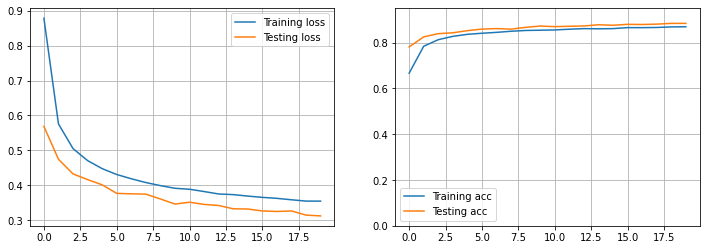

In [207]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.set_ylim(0.0,0.95)
ax2.legend()
ax2.grid()

In [208]:
loss_train, metric_train = model.evaluate(xTrain, yTrain, verbose=0)
print('Train accuracy:', metric_train)

loss_test, metric_test = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', metric_test)
print('Test loss:', loss_test)

Train accuracy: 0.8985000252723694
Test accuracy: 0.8842999935150146
Test loss: 0.31210124492645264


c) Learn how you can change the weights and bias initialisers for MLP and CNN layers and
for your model in your framework of choice.


<font style="color:red"> <h2> manipulate the kernel initializer and bias initializer</h2></font>


d) Now play with other initialisers. Train the model for each setting over (at least) 10 epochs
and remember the resulting training /validation curves.
+ zero weight and zero bias
+ standard normal weights and zero bias
+ uniform weights (~U(-1/2; 1/2)) and zero bias.
+ Xavier Glorot initialization (for tanh) with zero bias.
+ Kaiming He initialization (for ReLU) with zero bias.


<font style="color:red"> <h2>Zero initializer</h2></font>


In [178]:
model = buildmodel(kernel_initializer="zeros",bias_initializer="zeros")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
log = model.fit(xTrain,yTrain,batch_size=batchSize,epochs=20,validation_data=(xTest,yTest))

Epoch 1/20
235/235 [==============================] - 16s 63ms/step - loss: 2.3027 - accuracy: 0.0962 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
235/235 [==============================] - 14s 60ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
235/235 [==============================] - 14s 61ms/step - loss: 2.3026 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
235/235 [==============================] - 15s 62ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
235/235 [==============================] - 14s 60ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
235/235 [==============================] - 14s 61ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
235/235 [==============================] - 14s 61ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy:

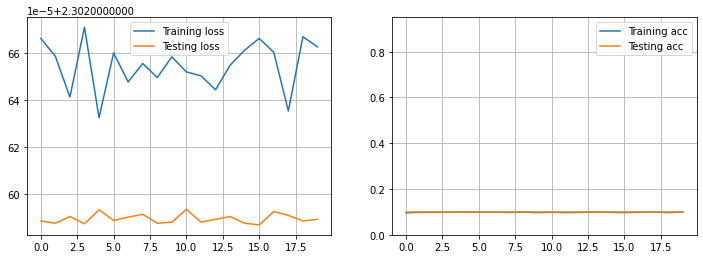

In [179]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.set_ylim(0.0,0.95)
ax2.legend()
ax2.grid()

In [180]:
loss_train, metric_train = model.evaluate(xTrain, yTrain, verbose=0)
print('Train accuracy:', metric_train)

loss_test, metric_test = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', metric_test)
print('Test loss:', loss_test)

Train accuracy: 0.10000000149011612
Test accuracy: 0.10000000149011612
Test loss: 2.3025901317596436


<font style="color:red"> <h2>Standard normal weight and zero bias initializer</h2></font>


In [181]:
model = buildmodel(kernel_initializer="random_normal",bias_initializer="zeros")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
log = model.fit(xTrain,yTrain,batch_size=batchSize,epochs=20,validation_data=(xTest,yTest))

Epoch 1/20
235/235 [==============================] - 15s 61ms/step - loss: 0.9356 - accuracy: 0.6467 - val_loss: 0.5976 - val_accuracy: 0.7721
Epoch 2/20
235/235 [==============================] - 14s 60ms/step - loss: 0.5730 - accuracy: 0.7841 - val_loss: 0.4766 - val_accuracy: 0.8250
Epoch 3/20
235/235 [==============================] - 14s 59ms/step - loss: 0.5032 - accuracy: 0.8144 - val_loss: 0.4326 - val_accuracy: 0.8417
Epoch 4/20
235/235 [==============================] - 14s 59ms/step - loss: 0.4655 - accuracy: 0.8298 - val_loss: 0.4112 - val_accuracy: 0.8472
Epoch 5/20
235/235 [==============================] - 14s 60ms/step - loss: 0.4433 - accuracy: 0.8374 - val_loss: 0.3876 - val_accuracy: 0.8558
Epoch 6/20
235/235 [==============================] - 14s 60ms/step - loss: 0.4240 - accuracy: 0.8442 - val_loss: 0.3774 - val_accuracy: 0.8592
Epoch 7/20
235/235 [==============================] - 14s 59ms/step - loss: 0.4134 - accuracy: 0.8481 - val_loss: 0.3686 - val_accuracy:

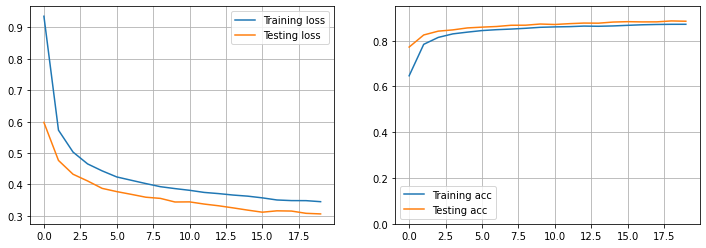

In [182]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.set_ylim(0.0,0.95)
ax2.legend()
ax2.grid()

In [183]:
loss_train, metric_train = model.evaluate(xTrain, yTrain, verbose=0)
print('Train accuracy:', metric_train)

loss_test, metric_test = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', metric_test)
print('Test loss:', loss_test)

Train accuracy: 0.8991833329200745
Test accuracy: 0.8849999904632568
Test loss: 0.3063051104545593


<font style="color:red"> <h2>Uniform weights and zero bias initializer</h2></font>


In [184]:
model = buildmodel(kernel_initializer="random_uniform",bias_initializer="zeros")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
log = model.fit(xTrain,yTrain,batch_size=batchSize,epochs=20,validation_data=(xTest,yTest))

Epoch 1/20
235/235 [==============================] - 16s 65ms/step - loss: 1.0330 - accuracy: 0.6047 - val_loss: 0.6337 - val_accuracy: 0.7522
Epoch 2/20
235/235 [==============================] - 15s 62ms/step - loss: 0.6296 - accuracy: 0.7620 - val_loss: 0.5388 - val_accuracy: 0.7963
Epoch 3/20
235/235 [==============================] - 16s 66ms/step - loss: 0.5531 - accuracy: 0.7917 - val_loss: 0.4871 - val_accuracy: 0.8148
Epoch 4/20
235/235 [==============================] - 15s 66ms/step - loss: 0.5033 - accuracy: 0.8127 - val_loss: 0.4499 - val_accuracy: 0.8338
Epoch 5/20
235/235 [==============================] - 18s 76ms/step - loss: 0.4691 - accuracy: 0.8256 - val_loss: 0.4164 - val_accuracy: 0.8442
Epoch 6/20
235/235 [==============================] - 16s 68ms/step - loss: 0.4532 - accuracy: 0.8322 - val_loss: 0.4057 - val_accuracy: 0.8509
Epoch 7/20
235/235 [==============================] - 15s 65ms/step - loss: 0.4349 - accuracy: 0.8385 - val_loss: 0.3933 - val_accuracy:

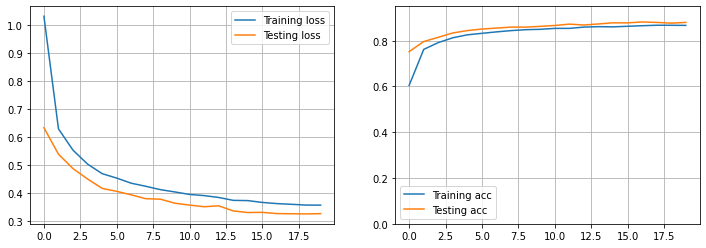

In [185]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.set_ylim(0.0,0.95)
ax2.legend()
ax2.grid()

In [186]:
loss_train, metric_train = model.evaluate(xTrain, yTrain, verbose=0)
print('Train accuracy:', metric_train)

loss_test, metric_test = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', metric_test)
print('Test loss:', loss_test)

Train accuracy: 0.8950333595275879
Test accuracy: 0.879800021648407
Test loss: 0.3258609473705292


<font style="color:red"> <h2>Glorot initializer</h2></font>


In [187]:
initializer = GlorotNormal()
model = buildmodel(kernel_initializer=initializer,bias_initializer="zeros")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
log = model.fit(xTrain,yTrain,batch_size=batchSize,epochs=20,validation_data=(xTest,yTest))

Epoch 1/20
235/235 [==============================] - 16s 64ms/step - loss: 0.8636 - accuracy: 0.6747 - val_loss: 0.5547 - val_accuracy: 0.7856
Epoch 2/20
235/235 [==============================] - 14s 61ms/step - loss: 0.5579 - accuracy: 0.7903 - val_loss: 0.4727 - val_accuracy: 0.8240
Epoch 3/20
235/235 [==============================] - 15s 63ms/step - loss: 0.4935 - accuracy: 0.8180 - val_loss: 0.4150 - val_accuracy: 0.8434
Epoch 4/20
235/235 [==============================] - 16s 67ms/step - loss: 0.4557 - accuracy: 0.8304 - val_loss: 0.3931 - val_accuracy: 0.8565
Epoch 5/20
235/235 [==============================] - 14s 61ms/step - loss: 0.4371 - accuracy: 0.8390 - val_loss: 0.3778 - val_accuracy: 0.8631
Epoch 6/20
235/235 [==============================] - 15s 62ms/step - loss: 0.4194 - accuracy: 0.8455 - val_loss: 0.3763 - val_accuracy: 0.8618
Epoch 7/20
235/235 [==============================] - 15s 62ms/step - loss: 0.4096 - accuracy: 0.8496 - val_loss: 0.3625 - val_accuracy:

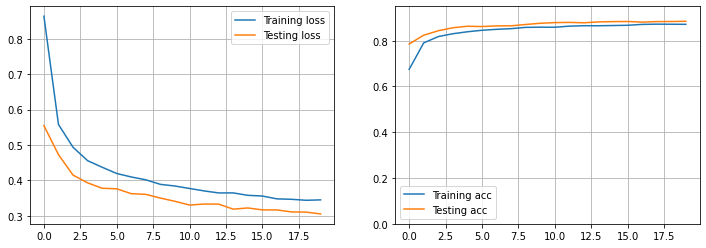

In [188]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.set_ylim(0.0,0.95)
ax2.legend()
ax2.grid()

In [189]:
loss_train, metric_train = model.evaluate(xTrain, yTrain, verbose=0)
print('Train accuracy:', metric_train)

loss_test, metric_test = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', metric_test)
print('Test loss:', loss_test)

Train accuracy: 0.8994333148002625
Test accuracy: 0.8848000168800354
Test loss: 0.3053158223628998


<font style="color:red"> <h2>He initializer</h2></font>


In [190]:
initializer = HeNormal()
model = buildmodel(kernel_initializer=initializer,bias_initializer="zeros")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
log = model.fit(xTrain,yTrain,batch_size=batchSize,epochs=20,validation_data=(xTest,yTest))

Epoch 1/20
235/235 [==============================] - 16s 62ms/step - loss: 0.8278 - accuracy: 0.6934 - val_loss: 0.5201 - val_accuracy: 0.8065
Epoch 2/20
235/235 [==============================] - 15s 62ms/step - loss: 0.5728 - accuracy: 0.7872 - val_loss: 0.4536 - val_accuracy: 0.8331
Epoch 3/20
235/235 [==============================] - 14s 60ms/step - loss: 0.5100 - accuracy: 0.8115 - val_loss: 0.4229 - val_accuracy: 0.8482
Epoch 4/20
235/235 [==============================] - 14s 61ms/step - loss: 0.4771 - accuracy: 0.8256 - val_loss: 0.4048 - val_accuracy: 0.8520
Epoch 5/20
235/235 [==============================] - 14s 60ms/step - loss: 0.4484 - accuracy: 0.8345 - val_loss: 0.3800 - val_accuracy: 0.8607
Epoch 6/20
235/235 [==============================] - 14s 60ms/step - loss: 0.4306 - accuracy: 0.8412 - val_loss: 0.3736 - val_accuracy: 0.8581
Epoch 7/20
235/235 [==============================] - 15s 64ms/step - loss: 0.4209 - accuracy: 0.8452 - val_loss: 0.3650 - val_accuracy:

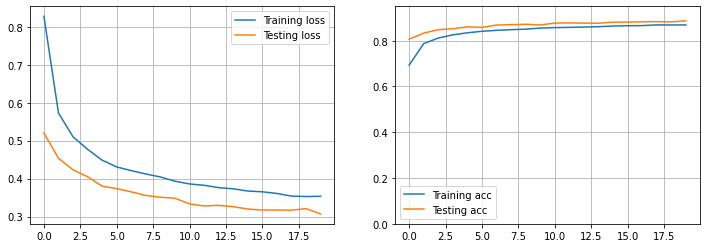

In [191]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.set_ylim(0.0,0.95)
ax2.legend()
ax2.grid()

In [192]:
loss_train, metric_train = model.evaluate(xTrain, yTrain, verbose=0)
print('Train accuracy:', metric_train)

loss_test, metric_test = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', metric_test)
print('Test loss:', loss_test)

Train accuracy: 0.9008166790008545
Test accuracy: 0.8867999911308289
Test loss: 0.3068440556526184


e) Create a comparison plot and discuss the results. Are they as expected ?

<font style="color:red">plots see above </br> Yes they are as expected as we discussed in the lecture we saw how the Glorot/He initializer start at the right area and does not need a lot of epochs to find the plateau</font>